In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
#                                   min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10)
# Gradient boosting algorithm parameters to be tuned are mentioned above,
# I recommend you to study all of them before proceeding directly to use them

Link to understand each single one of the parameter in GradientBoosting Regressor-> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Link to understand each single one of the parameter in GradientBoosting Classifier-> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

* min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
* min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
* max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
* max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
* subsample = 0.8 : This is a commonly used used start value

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')
df

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...,...
4596,4597,88,0.000,0.000,0.00,0.00,0.31,n
4597,4598,14,0.000,0.353,0.00,0.00,0.00,n
4598,4599,118,0.000,0.000,0.00,0.00,0.30,n
4599,4600,78,0.000,0.000,0.00,0.00,0.96,n


In [9]:
df['spam'] = df['yesno'].map({'y': 1, 'n': 0})

df = df.drop(['Unnamed: 0','yesno',], axis=1)

df

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


In [10]:
df.describe()

,crl.tot,dollar,bang,money,n000,make,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553,0.394045
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358,0.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000,1.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000,1.000000


In [11]:
df.mean()

crl.tot    283.289285
dollar       0.075811
bang         0.269071
money        0.094269
n000         0.101645
make         0.104553
spam         0.394045
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 7 columns):
crl.tot    4601 non-null int64
dollar     4601 non-null float64
bang       4601 non-null float64
money      4601 non-null float64
n000       4601 non-null float64
make       4601 non-null float64
spam       4601 non-null int64
dtypes: float64(5), int64(2)
memory usage: 251.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219607637C8>,
      dtype=object)

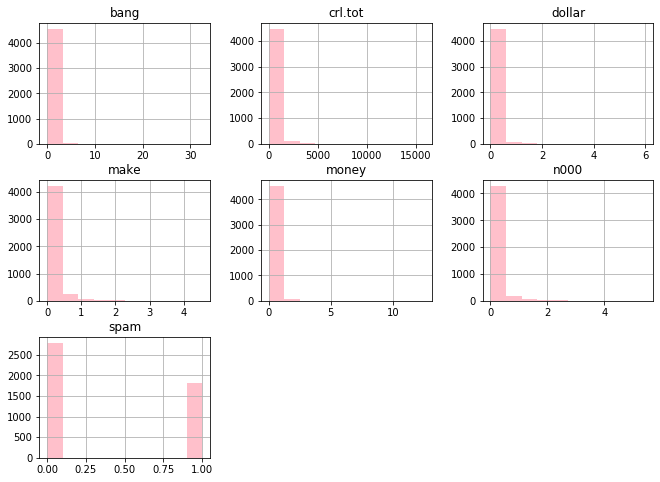

In [13]:
df.hist(figsize=(11,8),color="pink")

In [14]:
df.groupby(["spam"]).mean()

,crl.tot,dollar,bang,money,n000,make
spam,,,,,,
0,161.470947,0.011648,0.109984,0.017138,0.007088,0.073479
1,470.619415,0.174478,0.513713,0.212879,0.247055,0.152339


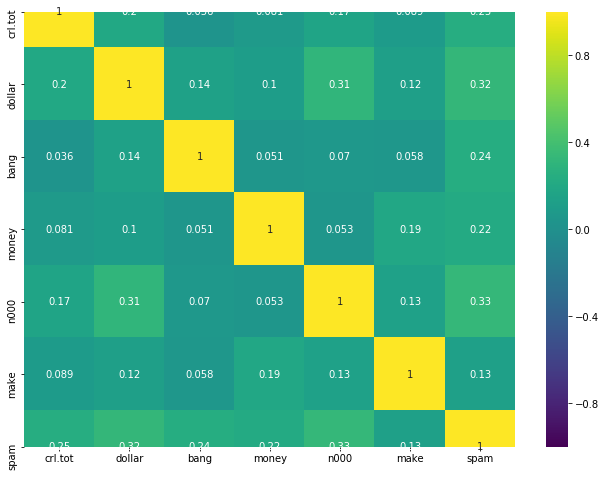

In [19]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="viridis")
plt.show()

In [22]:
df.corr().spam

crl.tot    0.249164
dollar     0.323629
bang       0.241888
money      0.216111
n000       0.334787
make       0.126208
spam       1.000000
Name: spam, dtype: float64

In [24]:
y =df.spam
df= df.loc[:, df.columns != 'spam']

In [25]:
dollar_bang=df['dollar']*df['bang']
dollar_money=df['dollar']*df['money']
dollar_n000=df['dollar']*df['n000']
dollar_make=df['dollar']*df['make']
dollar_crl=df['dollar']*df['crl.tot']

bang_money=df['bang']*df['money']
bang_n000=df['bang']*df['n000']
bang_make=df['bang']*df['make']
bang_crl=df['bang']*df['crl.tot']

money_n000=df['money']*df['n000']
money_make=df['money']*df['make']
money_crl=df['money']*df['crl.tot']

n000_make=df['n000']*df['make']
n000_crl=df['n000']*df['crl.tot']

make_crl=df['make']*df['crl.tot']

In [26]:
df=df.assign(dollar_bank=dollar_bang,dollar_money=dollar_money,dollar_n000=dollar_n000,dollar_make=dollar_make,dollar_crl=dollar_crl,bang_money=bang_money, bang_n000=bang_n000,bang_make=bang_make,bang_crl=bang_crl,money_n000=money_n000,money_make=money_make,money_crl=money_crl,n000_make=n000_make,n000_crl=n000_crl,make_crl=make_crl)

In [27]:
df

,crl.tot,dollar,bang,money,n000,make,dollar_bank,dollar_money,dollar_n000,dollar_make,...,bang_money,bang_n000,bang_make,bang_crl,money_n000,money_make,money_crl,n000_make,n000_crl,make_crl
0,278,0.000,0.778,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,216.284,0.0000,0.0000,0.00,0.0000,0.00,0.00
1,1028,0.180,0.372,0.43,0.43,0.21,0.066960,0.07740,0.07740,0.03780,...,0.15996,0.15996,0.07812,382.416,0.1849,0.0903,442.04,0.0903,442.04,215.88
2,2259,0.184,0.276,0.06,1.16,0.06,0.050784,0.01104,0.21344,0.01104,...,0.01656,0.32016,0.01656,623.484,0.0696,0.0036,135.54,0.0696,2620.44,135.54
3,191,0.000,0.137,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,26.167,0.0000,0.0000,0.00,0.0000,0.00,0.00
4,191,0.000,0.135,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,25.785,0.0000,0.0000,0.00,0.0000,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.0000,0.0000,0.00,0.0000,0.00,27.28
4597,14,0.000,0.353,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,4.942,0.0000,0.0000,0.00,0.0000,0.00,0.00
4598,118,0.000,0.000,0.00,0.00,0.30,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.0000,0.0000,0.00,0.0000,0.00,35.40
4599,78,0.000,0.000,0.00,0.00,0.96,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.0000,0.0000,0.00,0.0000,0.00,74.88


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

## Run a base model without tuning

### Tree specific parameters
* n_estimators=100 (number of trees)
* max_depth=3
* min_samples_split=2
* min_samples_leaf=1
* subsample=1.0

### Other Parameters
* learning_rate=0.1 (shrinkage)
* subsample: 1

Accuracy of the GBM on test set: 0.889
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       550
           1       0.92      0.80      0.85       371

    accuracy                           0.89       921
   macro avg       0.90      0.87      0.88       921
weighted avg       0.89      0.89      0.89       921



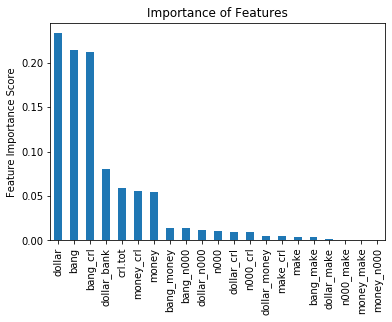

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

## 2nd model

### Tuning n-estimators and learning ratee
-> n_estimators captures the number of trees that we add to the model. A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.

-> The model's performance did not improve with the tuning, it is almost the same . Interestingly, there was also a slight change in the ranking of feature importance with the interaction of bang and crl_tot now ranked first.

Accuracy of the GBM on test set: 0.885
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       550
           1       0.91      0.79      0.85       371

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.89      0.88      0.88       921



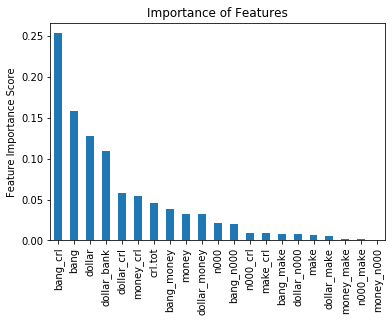

In [35]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

## Other Factors

### min_sample_split and min_samples_leaf_min

Min sample split and min samples leaf
min_samples_split sets the minimum number of samples to split while min_samples_leaf sets the minimum number of samples to form a leaf (Notice the slight difference).

### Subsample
Subsample sets the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

### Final Model Evaluation after changing all hyperparameters

Accuracy of the GBM on test set: 0.885
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       550
           1       0.91      0.79      0.85       371

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.89      0.88      0.88       921



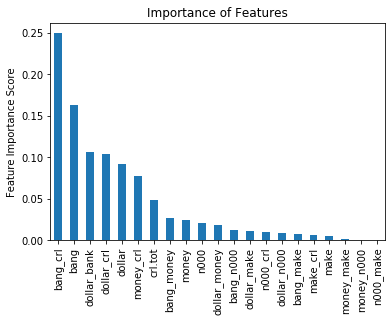

In [36]:
new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))